<a href="https://colab.research.google.com/github/prasum/ActivityDoubtResolution/blob/master/Activities_Doubt_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
act_doubt_df=pd.read_csv("act_doubt_df.csv")

Converting datetime string into Python datetime object and removing the UTC by localizing the Timezone to None. Getting the Doubt resolution time in hours by difference of doubt creation date from date of resolve of the doubt. Also some values are missing under columns and new columns introduced. So to handle them the column value is converted to Int64 type.

In [0]:
act_doubt_df['doubt_resolve_time']=pd.to_datetime(act_doubt_df['doubt_resolve_time']).dt.tz_localize(None)

In [0]:
act_doubt_df['doubt_creation_time']=pd.to_datetime(act_doubt_df['doubt_creation_time']).dt.tz_localize(None)

In [0]:
act_doubt_df["resolution_time"]=(act_doubt_df.doubt_resolve_time-act_doubt_df.doubt_creation_time).astype('timedelta64[h]')

In [0]:
act_doubt_df.head()

,doubt_id,TA_ID,TA_Count,doubt_resolve_time,user_type,student_id,course_id,doubt_creation_time,content_type,user_rating,state,resolution_time
0,248188,34120.0,3.0,2020-01-01 13:57:16,Student,280541,10,2020-01-01 00:58:22,Code Problem,5.0,resolved,12.0
1,248189,156881.0,1.0,2020-01-01 12:57:32,Student,32227,12,2020-01-01 02:02:21,Multiple Problem,5.0,resolved,10.0
2,248190,165368.0,1.0,2020-01-01 05:07:36,Student,357687,1,2020-01-01 02:14:37,Single_choice Problem,5.0,resolved,2.0
3,248191,208720.0,3.0,2020-01-02 14:39:49,Student,486150,11,2020-01-01 02:15:15,No_submission Problem,4.0,resolved,36.0
4,248192,163412.0,4.0,2020-01-02 13:05:58,Student,367920,13,2020-01-01 03:16:19,Datascience Problem,5.0,resolved,33.0


In [0]:
act_doubt_df['resolution_time']=act_doubt_df['resolution_time'].astype('Int64')
act_doubt_df['TA_Count']=act_doubt_df['TA_Count'].astype('Int64')

In [0]:
act_doubt_df.head()

,doubt_id,TA_ID,TA_Count,doubt_resolve_time,user_type,student_id,course_id,doubt_creation_time,content_type,user_rating,state,resolution_time
0,248188,34120.0,3,2020-01-01 13:57:16,Student,280541,10,2020-01-01 00:58:22,Code Problem,5.0,resolved,12
1,248189,156881.0,1,2020-01-01 12:57:32,Student,32227,12,2020-01-01 02:02:21,Multiple Problem,5.0,resolved,10
2,248190,165368.0,1,2020-01-01 05:07:36,Student,357687,1,2020-01-01 02:14:37,Single_choice Problem,5.0,resolved,2
3,248191,208720.0,3,2020-01-02 14:39:49,Student,486150,11,2020-01-01 02:15:15,No_submission Problem,4.0,resolved,36
4,248192,163412.0,4,2020-01-02 13:05:58,Student,367920,13,2020-01-01 03:16:19,Datascience Problem,5.0,resolved,33


From the above data we can infer that when the number of instructors who have worked on the problem increase, the resolution time (in hrs) increases. This corresponds to the number of times the doubt state was changed from assigned to available then review resolution and resolved by the student. The resolution time also depends on the content type of the problem if it is either Code Problem or Multiple Problem then the resolution time in hours is more

In [0]:
act_doubt_df['user_rating']=act_doubt_df['user_rating'].astype('Int64')
act_doubt_df['TA_ID']=act_doubt_df['TA_ID'].astype('Int64')
act_doubt_df.head()

,doubt_id,TA_ID,TA_Count,doubt_resolve_time,user_type,student_id,course_id,doubt_creation_time,content_type,user_rating,state,resolution_time
0,248188,34120,3,2020-01-01 13:57:16,Student,280541,10,2020-01-01 00:58:22,Code Problem,5,resolved,12
1,248189,156881,1,2020-01-01 12:57:32,Student,32227,12,2020-01-01 02:02:21,Multiple Problem,5,resolved,10
2,248190,165368,1,2020-01-01 05:07:36,Student,357687,1,2020-01-01 02:14:37,Single_choice Problem,5,resolved,2
3,248191,208720,3,2020-01-02 14:39:49,Student,486150,11,2020-01-01 02:15:15,No_submission Problem,4,resolved,36
4,248192,163412,4,2020-01-02 13:05:58,Student,367920,13,2020-01-01 03:16:19,Datascience Problem,5,resolved,33


In [0]:
act_doubt_df['resolution_time'].astype('float64').corr(act_doubt_df['user_rating'].astype('float64'))

-0.12503283208724875

We observe that the correlation between resolution_time and user_rating is negative. It can be inferred that if the resolution time is high then the user rating would be low and if the user rating is high then the resolution time would be low. Thus, here we obtain an inverse relationship of resolution_time with respect to the user_rating.

In [0]:
act_doubt_df.to_csv("activities_doubt_with_resolution_time.csv",index=False)

Getting the count of doubts solved by each TA. Here NaN values are ignored.

In [0]:
grouped_data=act_doubt_df.groupby('TA_ID')['doubt_id'].count().reset_index(name="No_Of_Doubts_Solved")

In [0]:
grouped_data.head(10)

,TA_ID,No_Of_Doubts_Solved
0,47,1
1,1940,26
2,6974,1
3,8709,26
4,10064,16
5,11519,8
6,12586,4
7,13430,8
8,13443,168
9,14491,61


In [0]:
grouped_data.to_csv("TA_Doubts_Count.csv",index=False)

Getting the Total resolution time for each course id. The performance is compared in the next section by using bar plots.

In [0]:
course_resolution_time_grouped=act_doubt_df.groupby('course_id')['resolution_time'].sum().reset_index(name="Total_Resolution_time_per_Course")

In [0]:
course_resolution_time_grouped.head(10)

,course_id,Total_Resolution_time_per_Course
0,1,53027
1,2,17578
2,4,5356
3,6,2934
4,10,43431
5,11,16505
6,12,4519
7,13,16546
8,21,1366
9,23,1163


In [0]:
course_resolution_time_grouped.to_csv("Course_Resolution_Time.csv",index=False)

Using seaborn library for visualization of the performance of course ids by total resolution time through bar plot.

In [0]:
!pip install seaborn

In [0]:
import seaborn as sns
sns.set()

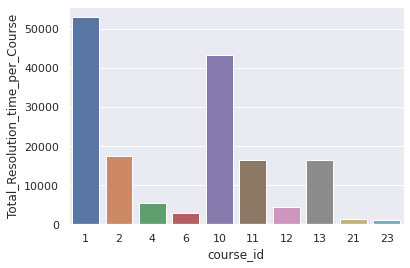

In [0]:
sns.barplot(x='course_id',y='Total_Resolution_time_per_Course',data=course_resolution_time_grouped)

From the above barplot between the course_id and the total resolution time, we observe that for Course ids 1 and 10 the content type of most of the doubts is either Code Problem or Multiple Problem. So the resolution time for them is much higher than the rest.

We have made another attribute Number of TAs involved in a doubt before its resolution. Let us check if it affects the user rating and the resolution time or not

In [0]:
act_doubt_df['TA_ID'].astype('float64').corr(act_doubt_df['user_rating'].astype('float64'))

-0.013194804572152241

From the above, we observe that both of them are negatively correlated i.e. they have an inverse relationship. If the number of TAs involved in the doubt are more, then the user rating is less and vice versa i.e. if number of TAs involved less then the user rating is more.

In [0]:
act_doubt_df['TA_ID'].astype('float64').corr(act_doubt_df['resolution_time'].astype('float64'))

0.01673772177504448

From the above, we observe that both of them are positively correlated i.e. they have a direct relationship. If the number of TAs involved are more, then the doubt resolution time is also more and if the number of TAs involved are less then the doubt resolution time is less. 